# First Question: Hypergeometric and binomial distributions

## Ali Borzoozadeh: 810102410

In [36]:
# Set the seed
set.seed(410)

### 1.

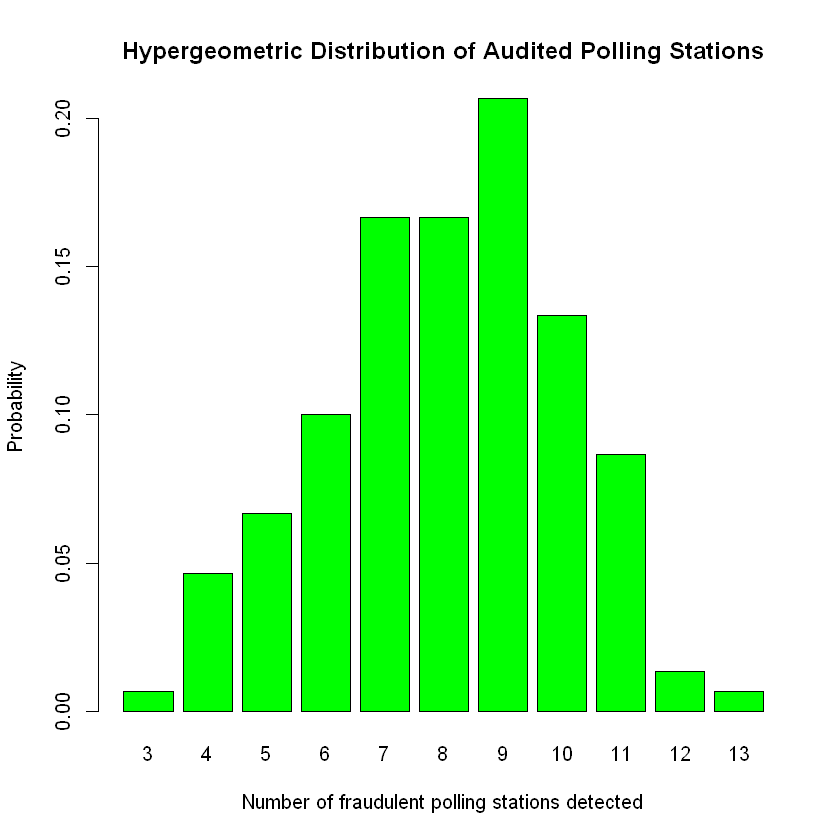

In [39]:
# Parameters
N <- 100  # Total number of polling stations
k <- 20   # Number of polling stations with fraud
m <- 40   # Number of polling stations to be audited
n <- 150  # Number of samples for the simulation

# Simulate hypergeometric distribution
samples <- rhyper(n, k, N - k, m)

# Create a table of frequencies
freq_table <- table(samples)

# Calculate probabilities
probabilities <- freq_table / n

# Plot the distribution using barplot
barplot(probabilities, 
        main = "Hypergeometric Distribution of Audited Polling Stations",
        xlab = "Number of fraudulent polling stations detected",
        ylab = "Probability",
        col = "green",
        border = "black")

### 2.

It is clear that in the theoretical calculation, the value of n has no effect, because we do not use simulations that require experiments, and the answer is independent of n.

#### Mathematical approach:

In [44]:
# Mathematical calculations
p <- k / N
mathematical_mean <- m * p
mathematical_variance <- mathematical_mean * (1 - p) * (N - m) / (N - 1)

#### Simulated approach:

In [47]:
# Function to calculate mean and variance of frauds found using simulation
calculate_mean_variance <- function(N, k, m, n_start, n_end, step_size)
{
  results <- data.frame(SampleSize = integer(), Mean = numeric(), Variance = numeric())
    
  for (n in seq(n_start, n_end, by = step_size))
  {
    samples <- rhyper(n, k, N - k, m)
    mean_frauds <- mean(samples)
    variance_frauds <- var(samples)
    results <- rbind(results, data.frame(SampleSize = n, Mean = mean_frauds, Variance = variance_frauds))
  }
    
  return(results)
}

n_start <- 100  # Start sample size
n_end <- 10000  # End sample size
step_size <- 50 # Step size

# Calculate mean and variance
results <- calculate_mean_variance(N, k, m, n_start, n_end, step_size)

### 3.

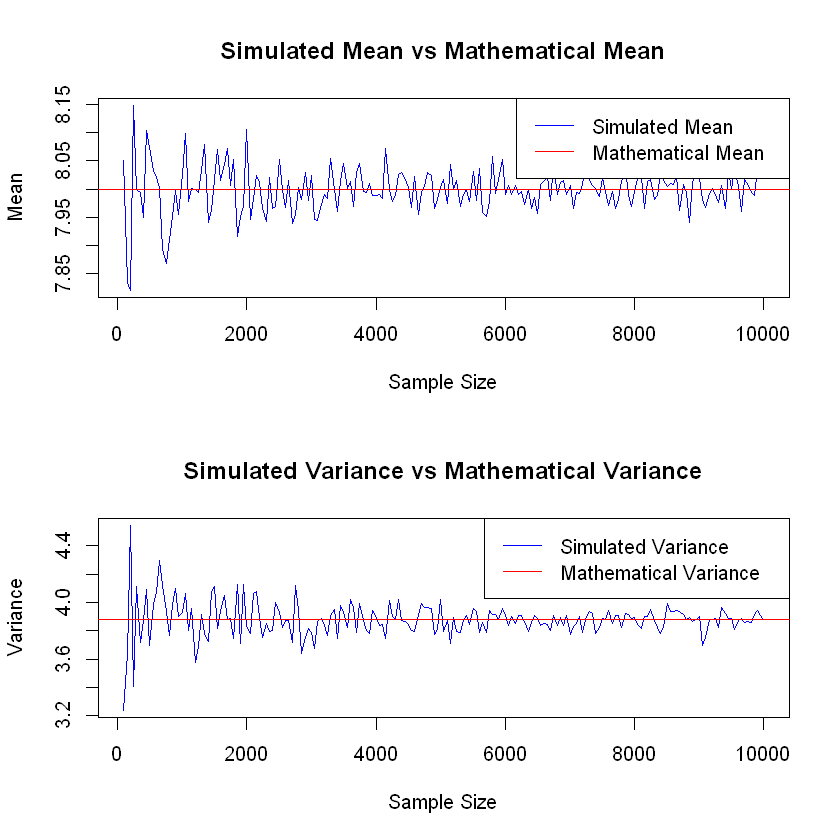

In [50]:
# Plot the results
par(mfrow = c(2, 1))

# Plot for Mean
plot(results$SampleSize, results$Mean, type = "l", col = "blue", 
     ylim = range(c(results$Mean, mathematical_mean)), 
     xlab = "Sample Size", ylab = "Mean", 
     main = "Simulated Mean vs Mathematical Mean")
abline(h = mathematical_mean, col = "red")
legend("topright", legend = c("Simulated Mean", "Mathematical Mean"), col = c("blue", "red"), lty = 1)

# Plot for Variance
plot(results$SampleSize, results$Variance, type = "l", col = "blue", 
     ylim = range(c(results$Variance, mathematical_variance)), 
     xlab = "Sample Size", ylab = "Variance", 
     main = "Simulated Variance vs Mathematical Variance")
abline(h = mathematical_variance, col = "red")
legend("topright", legend = c("Simulated Variance", "Mathematical Variance"), col = c("blue", "red"), lty = 1)

As can be seen, by increasing the number of simulations, the mean and variance values ​​become closer to the true value.

### 4.

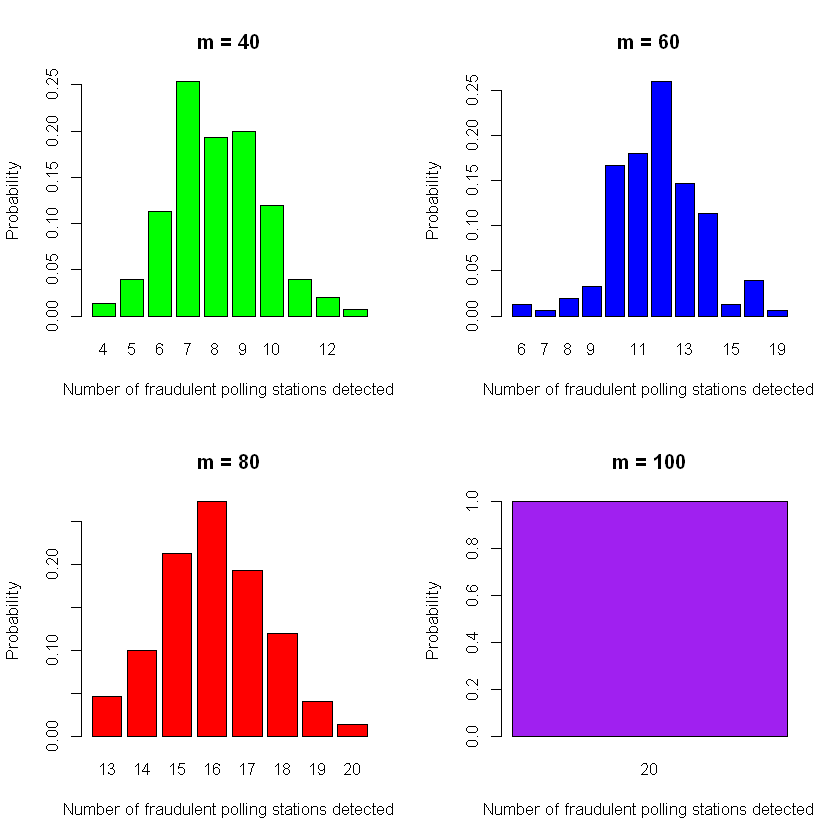

In [54]:
# Function to simulate and plot hypergeometric distribution for different m values
plot_hypergeometric_distributions <- function(N, k, n, m_values)
{
    colors <- c("green", "blue", "red", "purple")
    
    # Set up a 2x2 plotting layout
    par(mfrow = c(2, 2))
    
    for (i in 1:length(m_values))
    {
        samples <- rhyper(n, k, N - k, m_values[i])
        freq_table <- table(samples)
        probabilities <- freq_table / n
        barplot(probabilities, 
                main = paste("m =", m_values[i]),
                xlab = "Number of fraudulent polling stations detected",
                ylab = "Probability",
                col = colors[i],
                border = "black")
    }
    
    # Reset plotting parameters
    par(mfrow = c(1, 1))
}

# Values of m to compare
m_values <- c(40, 60, 80, 100)

# Plot the distributions
plot_hypergeometric_distributions(N, k, n, m_values)

The more we increase the m value, the closer the peak of the graph gets to k. Until, when we take the population size, we have observed 100% of all the polling stations where fraud has occurred. In fact, the peaks of the graphs in all 4 graphs show this formula: $$m \cdot \frac{k}{N}$$

### 5.

In [58]:
# Hypergeometric distribution PMF function
hypergeometric_pmf <- function(k, N, K, n, x)
{
  if (x < 0 || x > min(n, K))
  {
    return(0)
  }
  return((choose(K, x) * choose(N - K, n - x)) / choose(N, n))
}

# Binomial distribution PMF function
binomial_pmf <- function(n, p, x)
{
  if (x < 0 || x > n)
  {
    return(0)
  }
  return(choose(n, x) * (p ^ x) * ((1 - p) ^ (n - x)))
}

#### 6.

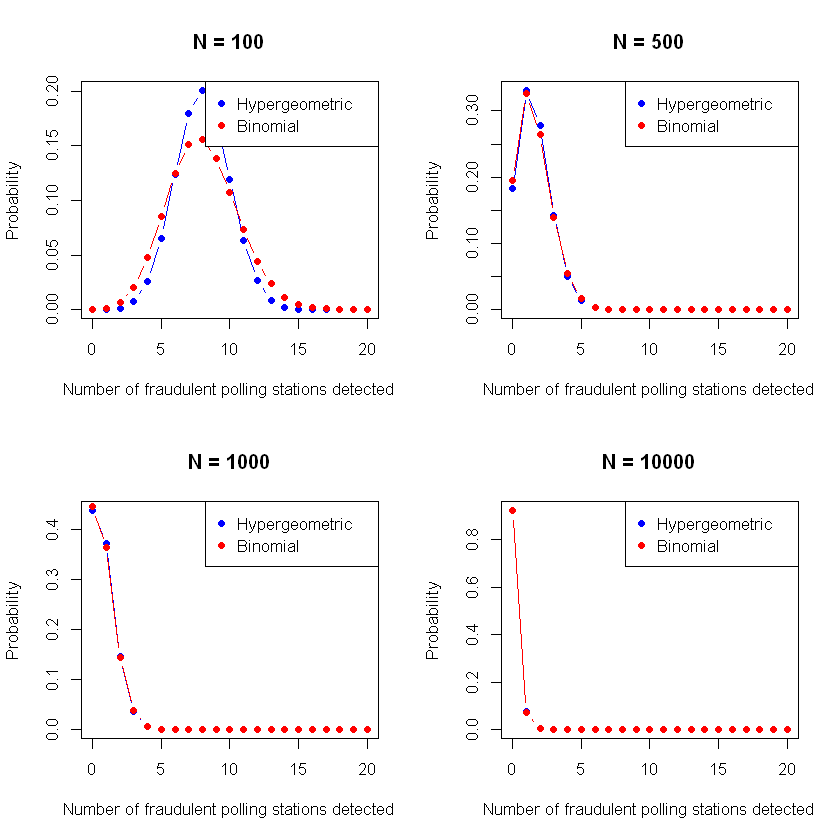

In [61]:
# Function to plot PMF curves
plot_pmf_curves <- function(N, K, n, p, x_values, title)
{
  # Calculate PMF values for hypergeometric distribution
  hypergeometric_pmf_values <- sapply(x_values, function(x) hypergeometric_pmf(k, N, K, n, x))
  
  # Calculate PMF values for binomial distribution
  binomial_pmf_values <- sapply(x_values, function(x) binomial_pmf(n, p, x))
  
  # Plot the PMF curves
  plot(x_values, hypergeometric_pmf_values, type = "b", col = "blue", pch = 19,
       xlab = "Number of fraudulent polling stations detected", ylab = "Probability", 
       main = title)
  lines(x_values, binomial_pmf_values, type = "b", col = "red", pch = 19)
  legend("topright", legend = c("Hypergeometric", "Binomial"), col = c("blue", "red"), pch = 19)
}

# Parameters
K <- 20       # Number of successes in the population
n <- 40       # Number of draws
x_values <- 0:20  # Random variable values from 0 to 20
N_values <- c(100, 500, 1000, 10000)  # Values of N to compare

# Plot the distributions for each N value
par(mfrow = c(2, 2))  # Set up the plotting area to have 2 rows and 2 columns

for (N in N_values)
{
  plot_pmf_curves(N, K, n, K / N, x_values, paste("N =", N))
}

par(mfrow = c(1, 1))  # Reset the plotting area

As mentioned earlier, the hypergeometric distribution tends towards a binomial distribution for large N. Here too, it can be seen that for larger N, these two graphs become closer together. Since the other values ​​are constant and only the value of the N changes, according to the mathematical expectation formula mentioned earlier, as the N increases, the peak of the graph moves towards zero. $$\lim_{N \rightarrow \infty} \frac{m \cdot k}{N} = 0$$